# Setup

In [86]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
%load_ext autoreload
%aimport networks
from networks import BAGraph
%aimport log_bin
# helper functions
%aimport utils
font_size = 20
%autoreload 1

# Fixed m and varying N

In [4]:
# save to file
# df.to_csv('data/ba/degree_distribution1/fixed_m_degrees.csv')

# load from file
df = pd.read_csv('data/ba/degree_distribution1/fixed_m_degrees.csv', index_col=0)
df.columns = df.columns.astype(int)

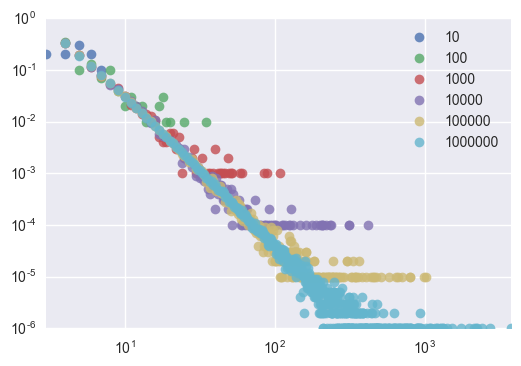

In [5]:
degrees_df = utils.value_counts_and_plot(df)

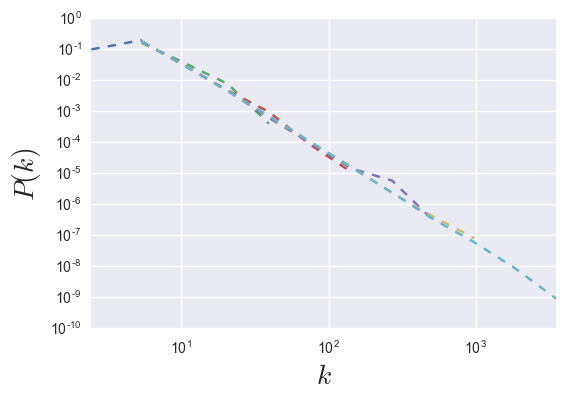

In [22]:
a = list(np.linspace(1.2, 1.2, num=len(df.columns)))
log_binned_df = utils.log_bin_and_plot(df, a=1.9, font_size=font_size, style='--', loglog=True)

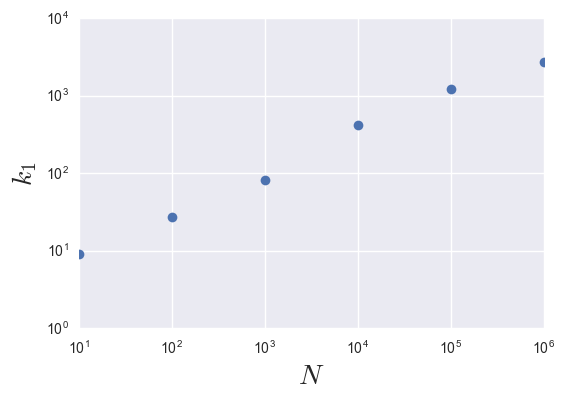

In [28]:
largest_expected_degree = []
for col in df:
    a = df[col].max()
    largest_expected_degree.append(a)

pd.Series(largest_expected_degree, index=degrees_df.columns).plot(style='o', loglog=True)
ax = plt.gca()
ax.set_ylabel(u"$k_1$", fontsize=font_size)
ax.set_xlabel(u"$N$", fontsize=font_size)

Largest expected degree looks somewhat like a straight line when 

# Fixed N and varying m

In [3]:
# save to file
# fixed_n_df.to_csv('data/ba/degree_distribution1/fixed_n_degrees.csv')

# load from file
fixed_n_df = pd.read_csv('data/ba/degree_distribution1/fixed_n_degrees.csv', index_col=0)
fixed_n_df.columns = fixed_n_df.columns.astype(int)

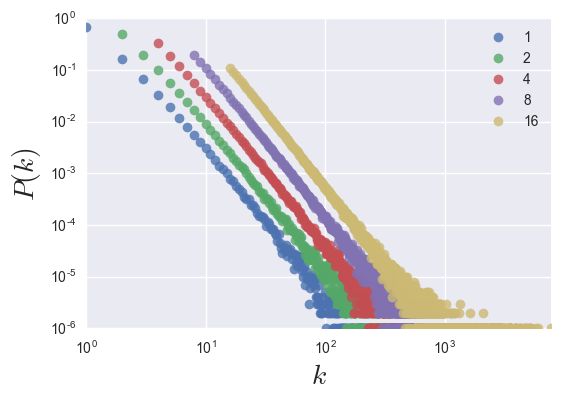

In [4]:
fixed_n_degrees = utils.value_counts_and_plot(fixed_n_df)
ax = plt.gca()
ax.set_ylabel(u'$P(k)$', fontsize=font_size)
ax.set_xlabel(u'$k$', fontsize=font_size)

## Visualizing reversed cumulative distribution

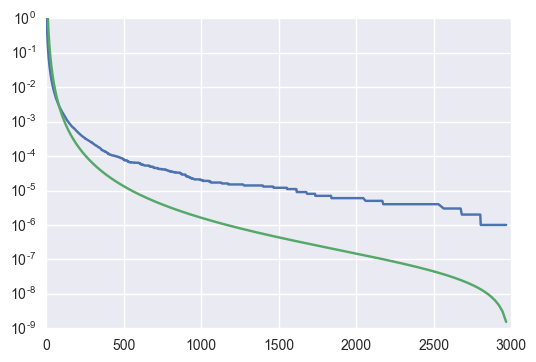

In [53]:
# plot one of them (reverse cumulative distribution)
ax = plt.figure().gca()
rev = fixed_n_degrees.reindex(index=fixed_n_degrees.index[::-1])
rev = rev.fillna(0)
column_to_plot = rev.cumsum().reindex(index=rev.index[::-1])[4]
column_to_plot[column_to_plot != 0].plot(logy=True, ax=ax)

last_k = np.log10(column_to_plot[column_to_plot != 0].index[-1])
ks = np.logspace(0.0001, last_k, 1000)
a = utils.deg_dist_cumulative(4, ks)
pd.DataFrame(a, index=ks).plot(logy=True, ax=ax, ylim=(1e-9, 1), xlim=(0, 3000), legend=False)

## log bin

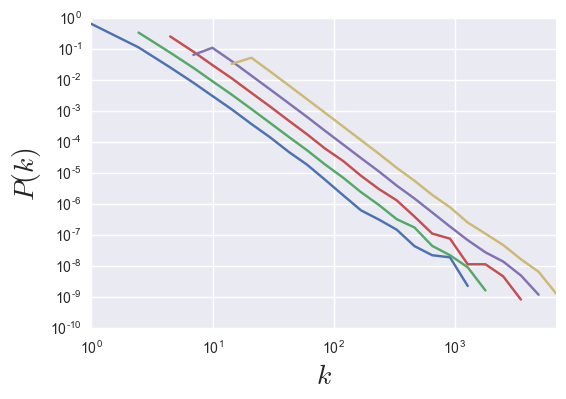

In [108]:
fixed_n_logbin = utils.log_bin_and_plot(fixed_n_df, a=1.4, font_size=font_size, style='-', loglog=True)

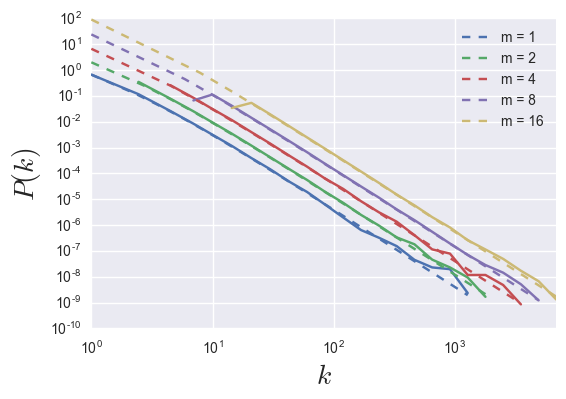

In [109]:
# plot numerical results
utils.log_bin_and_plot(fixed_n_df, a=1.4, font_size=font_size, style='-', loglog=True, label='__nolegend__')
result = utils.get_model_df(fixed_n_logbin, fixed_n_logbin.columns)

# plot model
current_palette = sns.color_palette()
for i, col in enumerate(result):
    result[col].dropna().plot(loglog=True, style='--', color=current_palette[i], label='m = '+str(col))
plt.legend()

## ks test

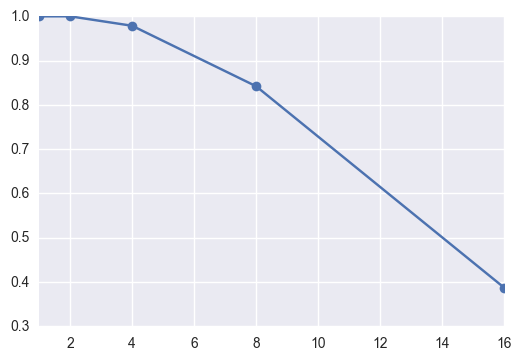

In [133]:
pvalues = []
for col in fixed_n_logbin:
    model_values = utils.deg_dist_theory(col, fixed_n_logbin[col].dropna().index)
    ks_stat, pvalue = scipy.stats.ks_2samp(fixed_n_logbin[col].dropna().values, model_values)
    pvalues.append(pvalue)
pd.Series(pvalues, index=fixed_n_logbin.columns).plot(style='-o')

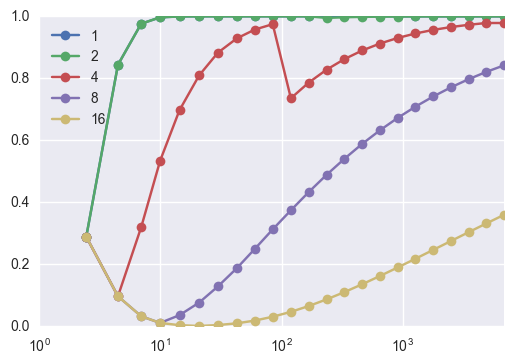

In [122]:
ks_pvalues = pd.DataFrame()
for col in fixed_n_logbin:
    model_values = utils.deg_dist_theory(col, fixed_n_logbin[col].dropna().index)
    col_list = []
    for i, value in enumerate(fixed_n_logbin[col]):
        if value == np.nan or i == 0:
            col_list.append(np.nan)
            continue
        ks_stat, pvalue = scipy.stats.ks_2samp(fixed_n_logbin[col].head(i).dropna().values, model_values[:i])
        col_list.append(pvalue)
    additional = pd.DataFrame({col: col_list}, index=fixed_n_logbin[col].index)
    ks_pvalues = pd.concat([ks_pvalues, additional], axis=1)
ks_pvalues.plot(style='-o', logx=True)

## Pearson coefficient

In [153]:
model_df = utils.get_model_df(fixed_n_logbin, fixed_n_logbin.columns)
# model_df.corrwith(fixed_n_logbin)
from IPython.display import display
for col in fixed_n_logbin:
    new_df = pd.DataFrame({'numerical': fixed_n_logbin[col], 'theory': model_df[col]}, index=fixed_n_logbin.index)
    new_df = new_df.dropna()
    print(col)
    display(new_df.corr())

1


,numerical,theory
numerical,1.000000,0.999888
theory,0.999888,1.000000


2


,numerical,theory
numerical,1.000000,0.091274
theory,0.091274,1.000000


4


,numerical,theory
numerical,1.000000,-0.041624
theory,-0.041624,1.000000


8


,numerical,theory
numerical,1.000000,-0.090876
theory,-0.090876,1.000000


16


,numerical,theory
numerical,1.000000,-0.095894
theory,-0.095894,1.000000
